In [511]:

import pandas as pd
import datetime as dt
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import ExtraTreeRegressor, DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [512]:
df = pd.read_csv('failure.csv')

In [513]:
df.head(10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [515]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [516]:
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [517]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [518]:
abs(df.corr()["failure"].sort_values(ascending=False))

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute6    0.000550
attribute3    0.000948
Name: failure, dtype: float64

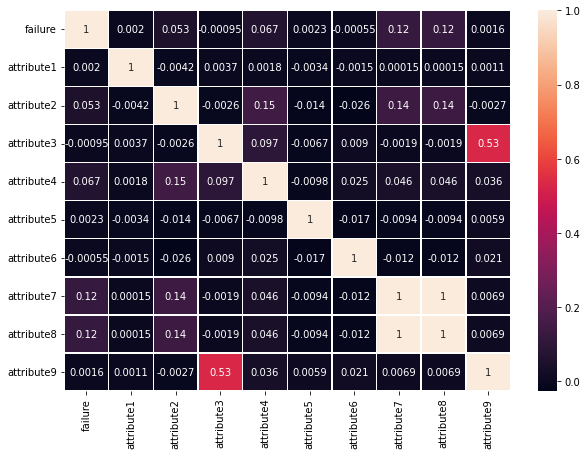

In [519]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

In [520]:
df.device.value_counts()

S1F0FGBQ    304
W1F0SJJ2    304
Z1F0GE1M    304
Z1F0KJDS    304
Z1F0KKN4    304
           ... 
Z1F0LT6P      5
Z1F0LT6Z      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
Name: device, Length: 1168, dtype: int64

In [521]:
df.attribute7.value_counts()

0      123036
8         793
16        397
24         65
48         36
32         35
128        23
40         20
176        20
6          13
72         11
96          7
56          6
312         5
736         4
80          4
104         3
152         2
832         2
272         2
112         2
22          2
744         1
216         1
496         1
240         1
136         1
424         1
Name: attribute7, dtype: int64

In [522]:
df.attribute8.value_counts()

0      123036
8         793
16        397
24         65
48         36
32         35
128        23
40         20
176        20
6          13
72         11
96          7
56          6
312         5
736         4
80          4
104         3
152         2
832         2
272         2
112         2
22          2
744         1
216         1
496         1
240         1
136         1
424         1
Name: attribute8, dtype: int64

In [523]:
df.drop("attribute8",axis=1,inplace=True)  #attribute7 and attribute 8 attribute are duplicated.

In [524]:
df.attribute3.value_counts()

0        115359
1          3274
2           749
7           298
34          293
5           278
21          269
4           268
9           262
8           251
61          245
100         245
10          241
1331        240
220         240
107         228
15          225
62          224
2693        179
318         177
70          118
3           113
18          106
56           96
12           90
72           84
263          84
406          84
35           70
11           14
208          13
14           12
25            6
2112          6
323           6
266           6
377           6
16            5
382           5
36            5
53            5
1326          5
24929         4
279           3
24            1
38            1
1162          1
Name: attribute3, dtype: int64

In [525]:
df.attribute9.value_counts()

0        97358
1         9436
2         3722
3         2327
4         1396
         ...  
1864         5
10137        4
30           3
38           3
2269         1
Name: attribute9, Length: 65, dtype: int64

In [526]:
df.device.nunique()  #1168 device

1168

In [527]:
df[df.failure == 1]  #106 failure

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,1
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,3
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,0
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,1
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109927,2015-08-04,W1F1CB5E,1,16043296,88,0,0,9,30,0,0
114251,2015-08-18,Z1F0MRPJ,1,65654088,0,0,0,9,298592,0,11
122118,2015-10-05,S1F0JGJV,1,13739704,0,0,18,8,343760,0,0
122808,2015-10-09,Z1F14BGY,1,85259320,0,0,164,8,262932,0,0


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute9  124494 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 10.4+ MB


In [529]:
df["date"]=pd.to_datetime(df["date"])
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day

In [530]:
#df.year.value_counts()  #all years are 2015.
#df.month.value_counts()
#df.day.value_counts()

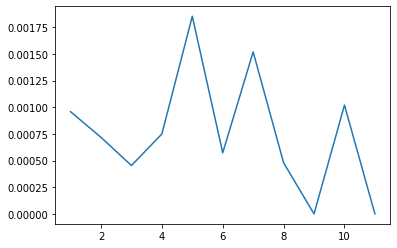

In [531]:
plt.plot(df.groupby("month")["failure"].mean());

In [532]:
df1 = pd.DataFrame()
#df1["workday"]= df.groupby("device")["date"].max()-df.groupby("device")["date"].min()
#df1["workday"]=df1["workday"].dt.days
#df1["workday"]

In [533]:
for i in df.columns :

  df1[i] = df.groupby("device")[i].max()

In [534]:
df1.shape,df.shape

((1168, 14), (124494, 14))

In [535]:
df1["workday"]= df.groupby("device")["date"].max()-df.groupby("device")["date"].min()
df1["workday"]=df1["workday"].dt.days
df1["workday"]

device
S1F01085      5
S1F013BB      5
S1F0166B      5
S1F01E6Y     47
S1F01JE0      5
           ... 
Z1F1VMZB    291
Z1F1VQFY    180
Z1F26YZB     83
Z1F282ZV     83
Z1F2PBHX     95
Name: workday, Length: 1168, dtype: int64

In [536]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, S1F01085 to Z1F2PBHX
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1168 non-null   datetime64[ns]
 1   device      1168 non-null   object        
 2   failure     1168 non-null   int64         
 3   attribute1  1168 non-null   int64         
 4   attribute2  1168 non-null   int64         
 5   attribute3  1168 non-null   int64         
 6   attribute4  1168 non-null   int64         
 7   attribute5  1168 non-null   int64         
 8   attribute6  1168 non-null   int64         
 9   attribute7  1168 non-null   int64         
 10  attribute9  1168 non-null   int64         
 11  year        1168 non-null   int64         
 12  month       1168 non-null   int64         
 13  day         1168 non-null   int64         
 14  workday     1168 non-null   int64         
dtypes: datetime64[ns](1), int64(13), object(1)
memory usage: 178.3+ KB

In [537]:
df1.drop(["date","year","day"],axis=1,inplace=True)

In [538]:
df1.shape

(1168, 12)

In [539]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, S1F01085 to Z1F2PBHX
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   device      1168 non-null   object
 1   failure     1168 non-null   int64 
 2   attribute1  1168 non-null   int64 
 3   attribute2  1168 non-null   int64 
 4   attribute3  1168 non-null   int64 
 5   attribute4  1168 non-null   int64 
 6   attribute5  1168 non-null   int64 
 7   attribute6  1168 non-null   int64 
 8   attribute7  1168 non-null   int64 
 9   attribute9  1168 non-null   int64 
 10  month       1168 non-null   int64 
 11  workday     1168 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 150.9+ KB


In [540]:
df1.columns

Index(['device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute9',
       'month', 'workday'],
      dtype='object')

In [541]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [542]:
df1[['attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute9',
       'month', 'workday']]=scaler.fit_transform(df1[['attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute9',
       'month', 'workday']])

In [543]:
df1.shape

(1168, 12)

In [544]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, S1F01085 to Z1F2PBHX
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   device      1168 non-null   object 
 1   failure     1168 non-null   int64  
 2   attribute1  1168 non-null   float64
 3   attribute2  1168 non-null   float64
 4   attribute3  1168 non-null   float64
 5   attribute4  1168 non-null   float64
 6   attribute5  1168 non-null   float64
 7   attribute6  1168 non-null   float64
 8   attribute7  1168 non-null   float64
 9   attribute9  1168 non-null   float64
 10  month       1168 non-null   float64
 11  workday     1168 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 150.9+ KB


In [545]:
columns =['failure', 'attribute1','attribute6','attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute7', 'attribute9',
       'month', 'workday']
for i in columns:
  df1[i] = df1[i].astype(int)
  

In [546]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, S1F01085 to Z1F2PBHX
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   device      1168 non-null   object
 1   failure     1168 non-null   int64 
 2   attribute1  1168 non-null   int64 
 3   attribute2  1168 non-null   int64 
 4   attribute3  1168 non-null   int64 
 5   attribute4  1168 non-null   int64 
 6   attribute5  1168 non-null   int64 
 7   attribute6  1168 non-null   int64 
 8   attribute7  1168 non-null   int64 
 9   attribute9  1168 non-null   int64 
 10  month       1168 non-null   int64 
 11  workday     1168 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 150.9+ KB


In [547]:
liste=list()

for i in df.groupby("device")["device"]:
  liste.append(i[0][0:3])

df1["device_type"]=liste
df1["device_type"]

device
S1F01085    S1F
S1F013BB    S1F
S1F0166B    S1F
S1F01E6Y    S1F
S1F01JE0    S1F
           ... 
Z1F1VMZB    Z1F
Z1F1VQFY    Z1F
Z1F26YZB    Z1F
Z1F282ZV    Z1F
Z1F2PBHX    Z1F
Name: device_type, Length: 1168, dtype: object

In [548]:
df1.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,month,workday,device_type
device,,,,,,,,,,,,,
S1F01085,S1F01085,0,0,0,0,0,0,1,0,0,0,-1,S1F
S1F013BB,S1F013BB,0,0,0,0,0,0,4,0,0,0,-1,S1F
S1F0166B,S1F0166B,0,0,0,0,0,0,1,0,0,0,-1,S1F
S1F01E6Y,S1F01E6Y,0,0,0,0,0,0,0,0,0,0,0,S1F
S1F01JE0,S1F01JE0,0,0,0,0,0,0,1,0,0,0,-1,S1F


In [549]:
df.drop("device",axis=1,inplace=True)

In [550]:
df1=pd.get_dummies(df1,drop_first=True)

In [551]:
df1.shape

(1168, 1180)

In [552]:
x = df1.drop("failure",axis=1)
y = df1["failure"]

In [553]:
#x=pd.get_dummies(x,drop_first=True)

In [554]:
x.shape,y.shape

((1168, 1179), (1168,))

In [555]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [556]:
from imblearn.over_sampling import SMOTE
SM= SMOTE(random_state=42)
x_train_new,y_train_new = SM.fit_resample(x_train,y_train)

In [557]:
x_train_new.shape ,y_train_new.shape

((1692, 1179), (1692,))

In [558]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import ExtraTreeRegressor, DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [559]:
g = GaussianNB() 
b = BernoulliNB()
k = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
log = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()

In [560]:
algorithms = [g, b, k, log, gbc, r, d]
names = ["GaussianNB", "BernoulliNB", "K Nearest", "Logistic", "GradientBoosting", "RandomForest", "DesicionTree"]

In [561]:
def algo_test(x, y, algorithms = algorithms, names = names):
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(x, y)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y, algorithms[i].predict(x)))
        precision.append(precision_score(y, algorithms[i].predict(x)))
        recall.append(recall_score(y, algorithms[i].predict(x)))
        f1.append(f1_score(y, algorithms[i].predict(x)))
    metrics = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F1"], index = names)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision
    metrics["Recall"] = recall
    metrics["F1"] = f1
    return metrics.sort_values("F1", ascending = False)

In [562]:
algo_test(x_train_new,y_train_new)

,Accuracy,Precision,Recall,F1
RandomForest,1.000000,1.000000,1.000000,1.000000
DesicionTree,1.000000,1.000000,1.000000,1.000000
GaussianNB,0.999409,0.998819,1.000000,0.999409
GradientBoosting,0.815603,0.734622,0.988180,0.842742
Logistic,0.809102,0.732444,0.973995,0.836124
BernoulliNB,0.693262,0.623958,0.972813,0.760277
K Nearest,0.682624,0.611875,0.998818,0.758868


In [563]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced


In [564]:
RUS=RandomUnderSampler(random_state=42)
x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)

In [565]:
 for item in algorithms:
    predict=item.fit(x_RUS,y_RUS).predict(x_test)

In [566]:
algo_test(x_train,y_train)

,Accuracy,Precision,Recall,F1
RandomForest,1.000000,1.000000,1.000000,1.000000
DesicionTree,1.000000,1.000000,1.000000,1.000000
GaussianNB,0.998929,0.988764,1.000000,0.994350
K Nearest,0.918630,0.642857,0.306818,0.415385
Logistic,0.917559,0.823529,0.159091,0.266667
GradientBoosting,0.918630,1.000000,0.136364,0.240000
BernoulliNB,0.905782,0.000000,0.000000,0.000000


In [567]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [568]:
model=Sequential()
model.add(Dense(12,activation="relu")) 
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [569]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [570]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1) 

Epoch 1/150
117/117 [==============================] - 1s 2ms/step - loss: 0.5119 - accuracy: 0.9084
Epoch 2/150
117/117 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.9092
Epoch 3/150
117/117 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.9092
Epoch 4/150
117/117 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.9092
Epoch 5/150
117/117 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9092
Epoch 6/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1174 - accuracy: 0.9092
Epoch 7/150
117/117 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9092
Epoch 8/150
117/117 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.9717
Epoch 9/150
117/117 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.9889
Epoch 10/150
117/117 [==============================] - 0s 2ms/step - loss: 0.0719 - accura

In [571]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                14160     
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 14,449
Trainable params: 14,449
Non-trai

In [572]:
scores=model.evaluate(x,y)

37/37 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9949


In [573]:
print("%s:%.2r%%" % (model.metrics_names[1],scores[1]*100))

accuracy:99%
